In [22]:
import twint
import pandas as pd
from networkx.algorithms import community
from wordcloud import WordCloud
import networkx as nx
import nltk
import tweepy
import matplotlib.pyplot as plt
plt.figure(figsize=(60,30))

<Figure size 4320x2160 with 0 Axes>

<Figure size 4320x2160 with 0 Axes>

In [15]:
from nltk.corpus import stopwords

In [305]:
def scrape(words, numtweet):
    df = pd.DataFrame(columns=['username', 'description', 'location', 'following',
                               'followers', 'totaltweets', 'retweetcount', 'text', 'hashtags','date'])
    tweets = tweepy.Cursor(api.search, q=words, lang="en",
                           tweet_mode='extended').items(numtweet)
     
    list_tweets = [tweet for tweet in tweets]
    for tweet in list_tweets:
        print(tweet.full_text,tweet.entities['hashtags'])
        username = tweet.user.screen_name
        description = tweet.user.description
        location = tweet.user.location
        following = tweet.user.friends_count
        followers = tweet.user.followers_count
        totaltweets = tweet.user.statuses_count
        retweetcount = tweet.retweet_count
        hashtags = tweet.entities['hashtags']
        date = tweet.created_at
        try:
            text = tweet.retweeted_status.full_text
        except AttributeError:
            text = tweet.full_text
        hashtext = []
        for j in range(0, len(hashtags)):
            hashtext.append(hashtags[j]['text'])
          
        _tweet = [username, description, location, following,
                     followers, totaltweets, retweetcount, text, hashtext, date]
        db.loc[len(db)] = _tweet
    filename = 'sl_elections.csv'
    df.to_csv(filename)

In [307]:
consumer_key = "xx"
consumer_secret = "xx"
access_key = "xx"
access_secret = "xx"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
# number of tweets you want to extract in one run
numtweet = 10000  
scrape('#Somalilandelection2021', numtweet)
print('Scraping has completed!')

In [81]:
df= pd.read_csv("sl_elections.csv")

In [288]:
df['username'].value_counts().nlargest(10)

cityofhargeisa     74
Somaalilanders     43
egal_fahad         39
UnabashedLander    36
somaliland_30      32
Abdirah51653853    31
Mux84N             30
BarkhadHassan1     27
SOMALIILAND        23
Sland_Med          22
Name: username, dtype: int64

In [122]:
tweets =df['text'].values
tweets = [t.split('https')[0].replace('\n', ' ') for t in tweets]

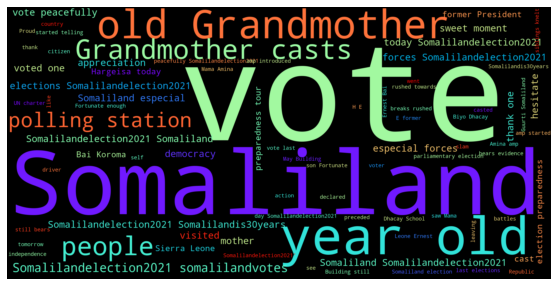

In [294]:
wordcloud_hc = WordCloud(max_font_size=100, 
                         max_words=1000, 
                         scale=6, 
                         relative_scaling=.6,
                         stopwords=stopwords.words('English'), 
                         background_color="black", colormap = "rainbow").generate(str(tweets))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_hc,interpolation="bilinear")
plt.axis("off")
plt.show()

In [152]:
htags = df['hashtags'].values

In [306]:
import ast
hashtags=[]
for t in htags:
    if len(t)>0:
        for tag in ast.literal_eval(t):
            hashtags.append(tag)

In [215]:
hashtags = [t.lower() for t in hashtags]

In [42]:
from collections import Counter

In [295]:
tags, tag_counts = zip(*Counter(hashtags).most_common(8))

In [50]:
import seaborn as sns

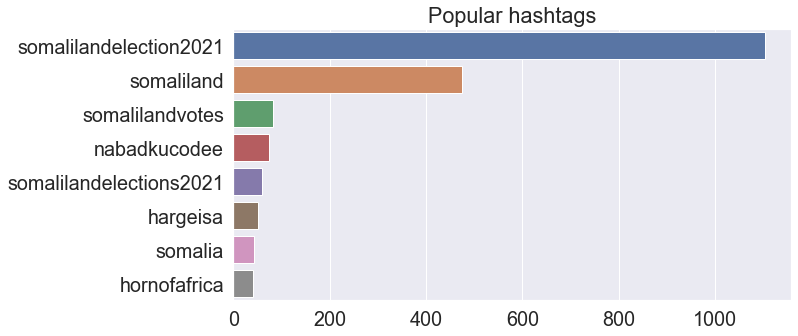

In [296]:
sns.set_style("white")
sns.set(font_scale=1.8)
plt.figure(figsize=(10, 5))
ax = sns.barplot(x =list(tag_counts), y =list(tags))
# ax.set_xticks(range(1,len(list(cats))+1))
plt.title("Popular hashtags")
plt.show()

In [221]:
import re

In [222]:
def get_mentions(txt):
    mention = re.findall('(\@[A-Za-z_]+)', txt)
    if mention:
        return mention
    else:
        return ""

In [224]:
df['mentions']= df['text'].apply(lambda t : get_mentions(t))

In [232]:
mentions = df['mentions'].explode()

In [246]:
ment, mention_counts = zip(*Counter(mentions).most_common(20))

In [247]:
mention_counts = [c for c in mention_counts if c!= max(mention_counts)]

In [ ]:
mention_counts

In [249]:
ment = [m for m in ment if m!='']

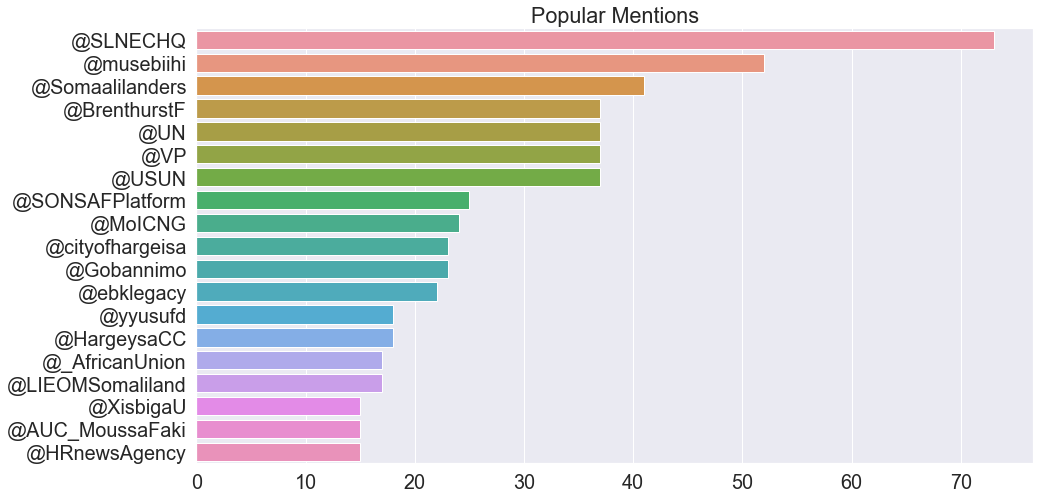

In [298]:
sns.set_style("white")
sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
sns.set(font_scale=1.8)
plt.figure(figsize=(15, 8))
ax = sns.barplot(x =list(mention_counts), y =list(ment))
# ax.set_xticks(range(1,len(list(cats))+1))
plt.title("Popular Mentions")
plt.show()

In [299]:
df_n = df[df["username"] == 'Somaalilanders'] 
df_n = df_n[df_n["hashtags"].notnull()]

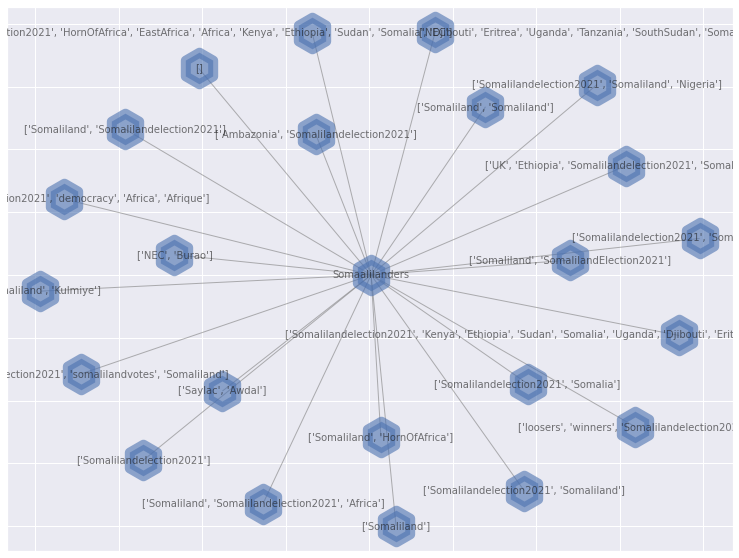

In [300]:
G  = nx.from_pandas_edgelist(df_n,"hashtags","username")
plt.figure(figsize = (13,10))
nx.draw_networkx(G,with_labels = True,font_size = 10,
                     font_color = "k",
                     font_family  = "DejaVu Sans",
                     node_shape  = "h",node_color = "b",
                     node_size = 1000,linewidths = 10,
                     edge_color = "grey",alpha = .6)